In [35]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
fake = pd.read_csv('C:\\Users\\snipe\\FND Project\\Fake.csv',encoding='latin1') 
true = pd.read_csv('C:\\Users\\snipe\\FND Project\\True.csv',encoding='latin1')

In [37]:
fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [38]:
fake.tail(5)

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied âSafe Zoneâ Plan ...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [39]:
true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [40]:
true.tail(5)

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [41]:
fake['target'] = 'FAKE'
true['target'] = 'REAL'

In [42]:
true.head(5)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL


In [43]:
data = pd.concat([fake, true]).reset_index(drop = True)
data

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",REAL
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",REAL
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",REAL
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",REAL


In [44]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)
data.head()

,title,text,subject,date,target
0,Kremlin says prospects for Putin-Trump meeting...,"DANANG, Vietnam (Reuters) - The prospects for ...",worldnews,"November 10, 2017",REAL
1,Deadline looms for South Africa's Zuma over re...,JOHANNESBURG (Reuters) - Lawyers for Jacob Zum...,worldnews,"November 30, 2017",REAL
2,"BREAKING: GA, KY, WV Confirm They Suspect Obam...",Georgia s secretary of state has claimed the D...,politics,"Dec 18, 2016",FAKE
3,WALMART MAKES SENIOR VETERAN Greeter Remove Mi...,"Lee Young, owner of Hitman Firearms posted thi...",left-news,"Dec 17, 2015",FAKE
4,BREAKING WIKILEAKS BOMBSHELL! Murdered DNC Sta...,Conspiracy theories have been surrounding the ...,left-news,"Apr 8, 2017",FAKE


In [45]:
data.drop(["date"],axis=1,inplace=True)
data.drop(["title"],axis=1,inplace=True)
data

,text,subject,target
0,"DANANG, Vietnam (Reuters) - The prospects for ...",worldnews,REAL
1,JOHANNESBURG (Reuters) - Lawyers for Jacob Zum...,worldnews,REAL
2,Georgia s secretary of state has claimed the D...,politics,FAKE
3,"Lee Young, owner of Hitman Firearms posted thi...",left-news,FAKE
4,Conspiracy theories have been surrounding the ...,left-news,FAKE
...,...,...,...
44893,JOHANNESBURG (Reuters) - South Africa s main o...,worldnews,REAL
44894,Police are investigating a possible hate crime...,News,FAKE
44895,ZURICH (Reuters) - A United States consular of...,worldnews,REAL
44896,Jack Shepherd The IndependentDespite George Lu...,US_News,FAKE


In [46]:
data.isnull().any()

text       False
subject    False
target     False
dtype: bool

In [47]:
data['text'] = data['text'].apply(lambda x: x.lower())
data

,text,subject,target
0,"danang, vietnam (reuters) - the prospects for ...",worldnews,REAL
1,johannesburg (reuters) - lawyers for jacob zum...,worldnews,REAL
2,georgia s secretary of state has claimed the d...,politics,FAKE
3,"lee young, owner of hitman firearms posted thi...",left-news,FAKE
4,conspiracy theories have been surrounding the ...,left-news,FAKE
...,...,...,...
44893,johannesburg (reuters) - south africa s main o...,worldnews,REAL
44894,police are investigating a possible hate crime...,News,FAKE
44895,zurich (reuters) - a united states consular of...,worldnews,REAL
44896,jack shepherd the independentdespite george lu...,US_News,FAKE


In [48]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
data['text'] = data['text'].apply(punctuation_removal)
data

,text,subject,target
0,danang vietnam reuters the prospects for a me...,worldnews,REAL
1,johannesburg reuters lawyers for jacob zuma h...,worldnews,REAL
2,georgia s secretary of state has claimed the d...,politics,FAKE
3,lee young owner of hitman firearms posted this...,left-news,FAKE
4,conspiracy theories have been surrounding the ...,left-news,FAKE
...,...,...,...
44893,johannesburg reuters south africa s main oppo...,worldnews,REAL
44894,police are investigating a possible hate crime...,News,FAKE
44895,zurich reuters a united states consular offic...,worldnews,REAL
44896,jack shepherd the independentdespite george lu...,US_News,FAKE


In [49]:
#stopwords removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.head(50)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snipe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,subject,target
0,danang vietnam reuters prospects meeting russi...,worldnews,REAL
1,johannesburg reuters lawyers jacob zuma midnig...,worldnews,REAL
2,georgia secretary state claimed department hom...,politics,FAKE
3,lee young owner hitman firearms posted incredi...,left-news,FAKE
4,conspiracy theories surrounding murder seth ri...,left-news,FAKE
5,voter asked question second presidential debat...,News,FAKE
6,washington reuters us presidentelect donald tr...,politicsNews,REAL
7,reuters standoff spain catalonia entered new p...,worldnews,REAL
8,brusselsdublin reuters british negotiators loc...,worldnews,REAL
9,breaking bombshell major political parties fra...,Government News,FAKE


In [50]:
print(data['text'])

0        danang vietnam reuters prospects meeting russi...
1        johannesburg reuters lawyers jacob zuma midnig...
2        georgia secretary state claimed department hom...
3        lee young owner hitman firearms posted incredi...
4        conspiracy theories surrounding murder seth ri...
                               ...                        
44893    johannesburg reuters south africa main opposit...
44894    police investigating possible hate crime bomb ...
44895    zurich reuters united states consular office s...
44896    jack shepherd independentdespite george lucas ...
44897                                                     
Name: text, Length: 44898, dtype: object


In [51]:
print(data.target)

0        REAL
1        REAL
2        FAKE
3        FAKE
4        FAKE
         ... 
44893    REAL
44894    FAKE
44895    REAL
44896    FAKE
44897    FAKE
Name: target, Length: 44898, dtype: object


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


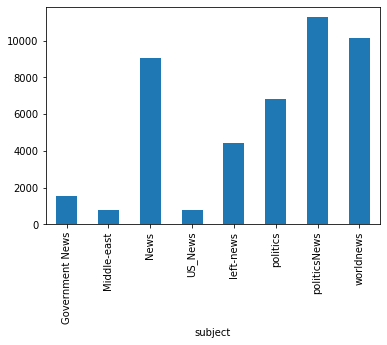

In [52]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()


target
FAKE    23481
REAL    21417
Name: text, dtype: int64


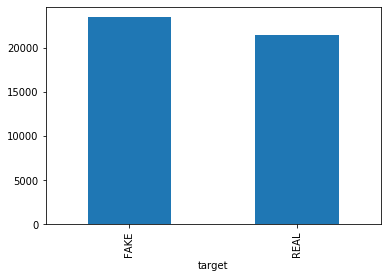

In [53]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

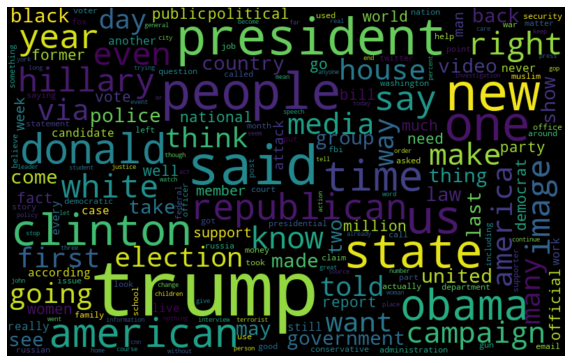

In [54]:
# Word cloud for fake news

from wordcloud import WordCloud

fake_data = data[data["target"] == "FAKE"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



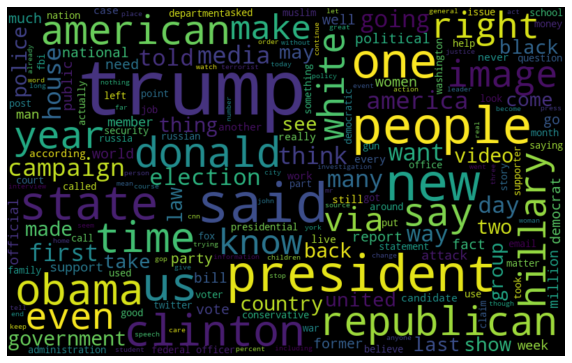

In [55]:
# Word cloud for real news

from wordcloud import WordCloud

real_data = data[data["target"] == "REAL"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


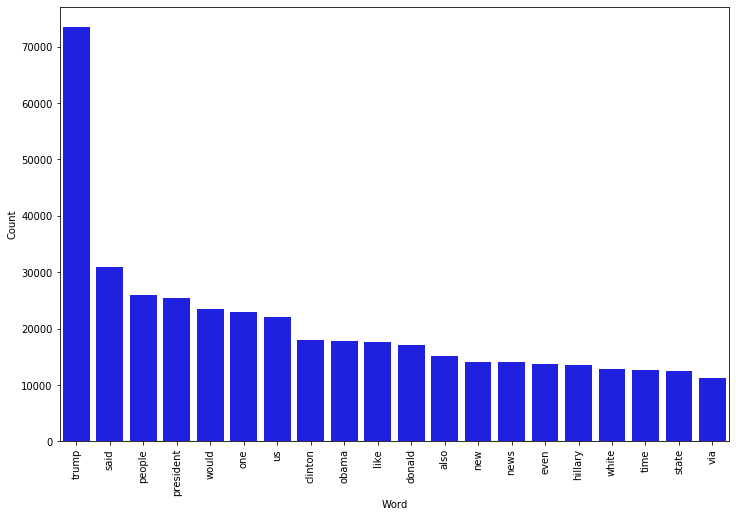

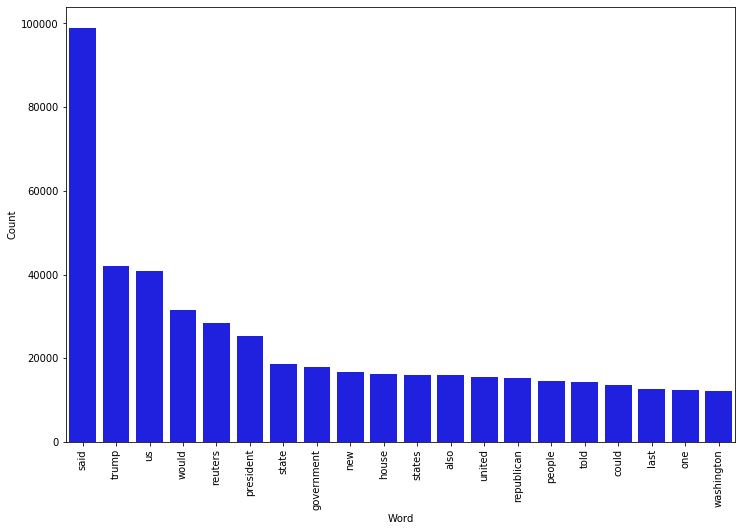

In [56]:
# Most frequent words counter

import seaborn as sns
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()


# Most frequent words in fake news
counter(data[data["target"] == "FAKE"], "text", 20)


# Most frequent words in real news
counter(data[data["target"] == "REAL"], "text", 20)

In [57]:
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2)

In [58]:
#tfidf_vectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                    ('nbmodel', MultinomialNB())])

In [60]:
model = pipeline.fit(x_train,y_train)

In [61]:
score = pipeline.score(x_test,y_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 95.87%


In [62]:
pred = model.predict(x_test)

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        FAKE       0.98      0.94      0.96      4733
        REAL       0.94      0.97      0.96      4247

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



In [64]:
print(confusion_matrix(y_test, pred))

[[4472  261]
 [ 110 4137]]


In [65]:
pickle.dump(model, open('model.pkl','wb'))  
model = pickle.load(open('model.pkl','rb'))

In [66]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("")
    else:
        print('')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

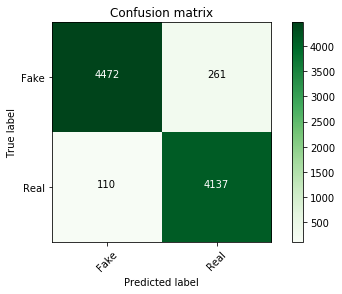

In [67]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


In [68]:
print(model.predict(["How elite leftists celebrate America s Independence Day The Kennedy clan gathered at their Hyannis Port compound on Cape Cod over the weekend for their annual Fourth of July festivities, and took some time to attack Donald Trump.Robert F. Kennedy Jr. s daughter Kathleen, between known as Kick, posted a photos of a pinata of The Donald from a family party over the weekend. It s yuge party!,  wrote Kick in the caption of the Instagram post, which also showed some of her family members milling about in the background.She later deleted the Instagram post just before 11am on Monday.Via: Daily Mail"]))

['FAKE']
